Use this ML algorithm

    Linear Regression
    Logistic Regression
    support vactor machine
    Random Forest Regression
    Gradient Boosting Regresso
    decision tree


In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [231]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Analysis


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [233]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [234]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [235]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [236]:
#find corelation between all columns
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Age Analysis

In [237]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [238]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


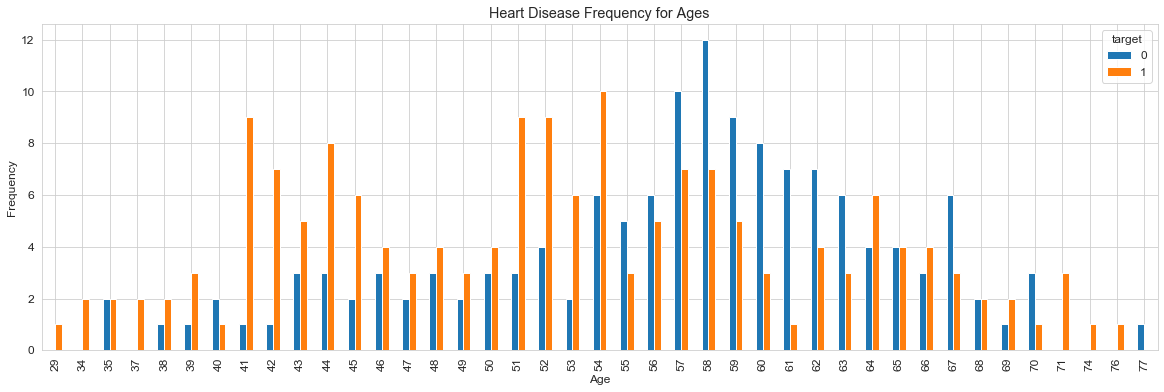

In [239]:

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

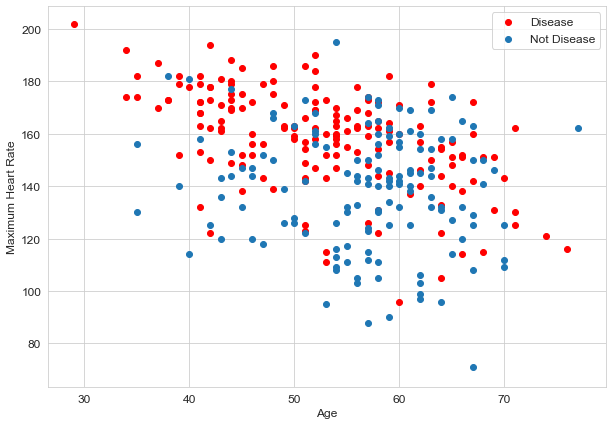

In [240]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Disease with sex

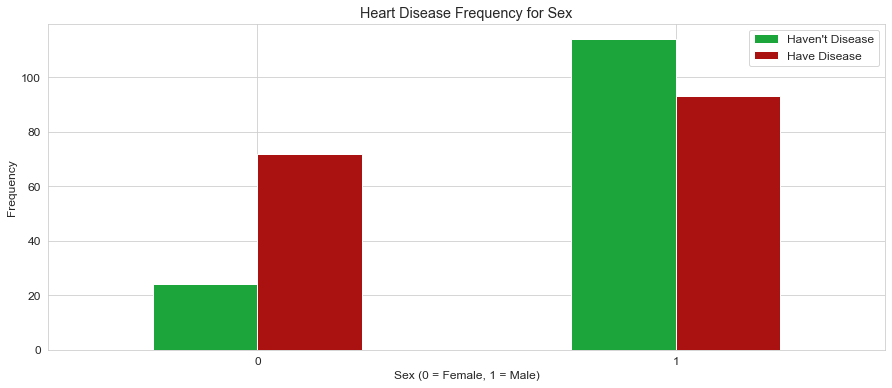

In [241]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

visulization Relation all columns

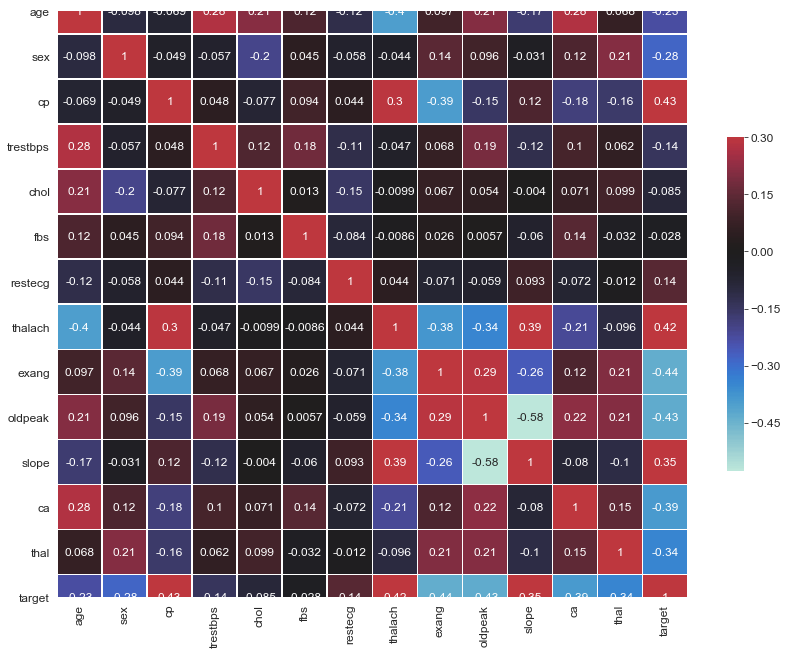

In [242]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.show()

In [243]:
df=df.drop('fbs',axis=1)

In [244]:
matplotlib.rcParams['figure.figsize'] =[10,7]
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['font.family'] = 'sans-serif'

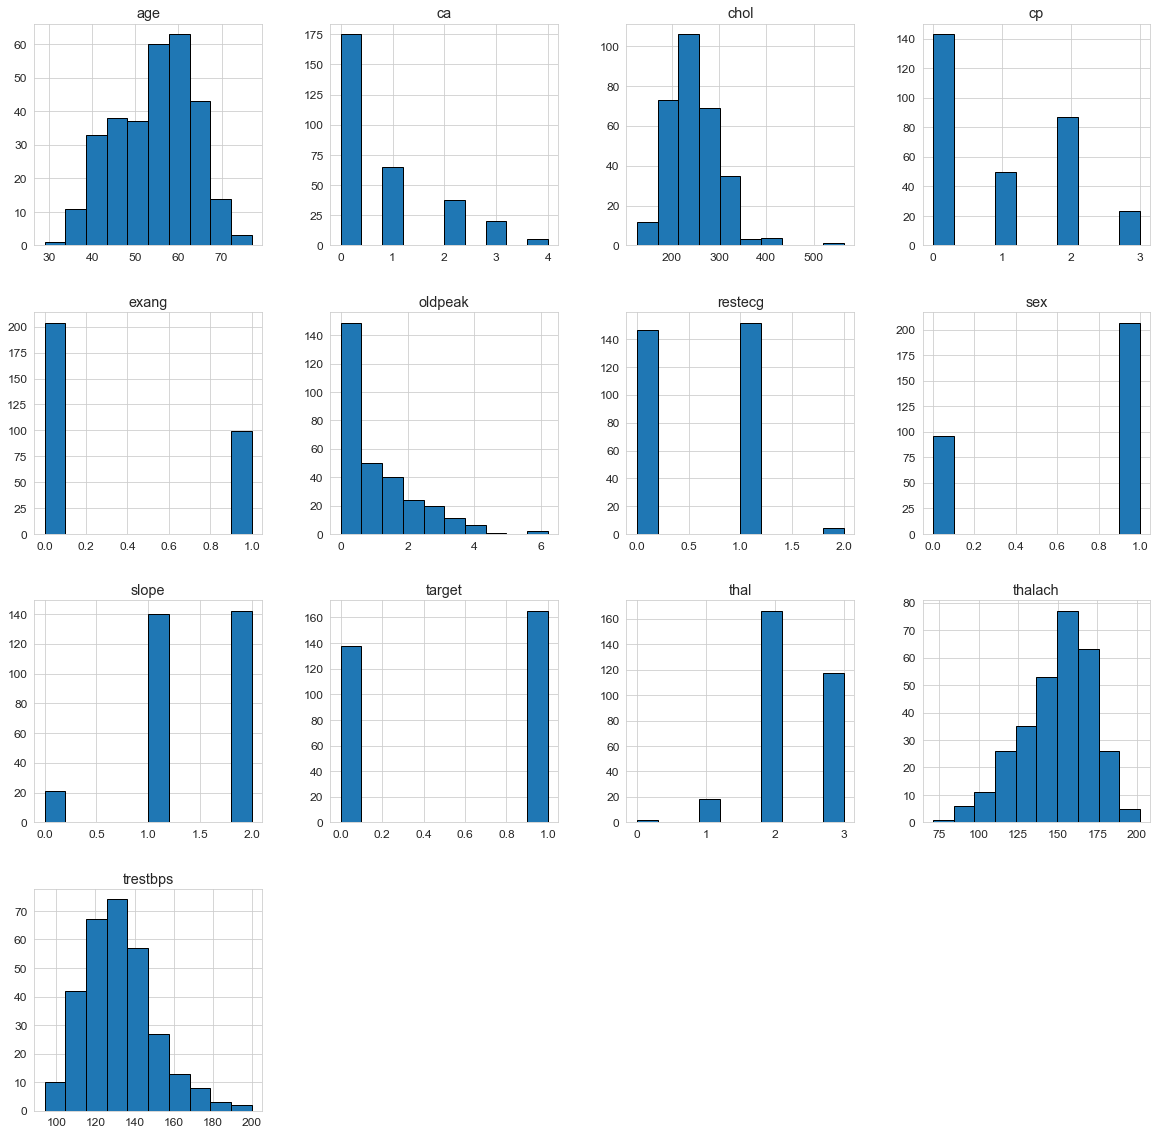

In [245]:
df.hist(figsize=(20,20),edgecolor='black')
plt.show()

Text(0.5, 1.0, '0 or 1')

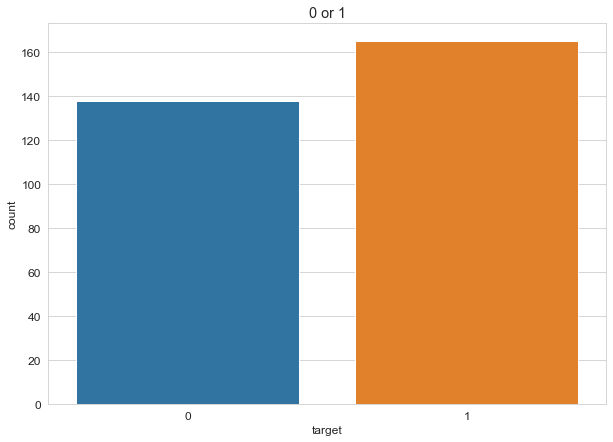

In [246]:
sns.countplot(x='target',data=df)
plt.title('0 or 1')

Text(0.5, 0, 'sex => 1 = male; 0 = female')

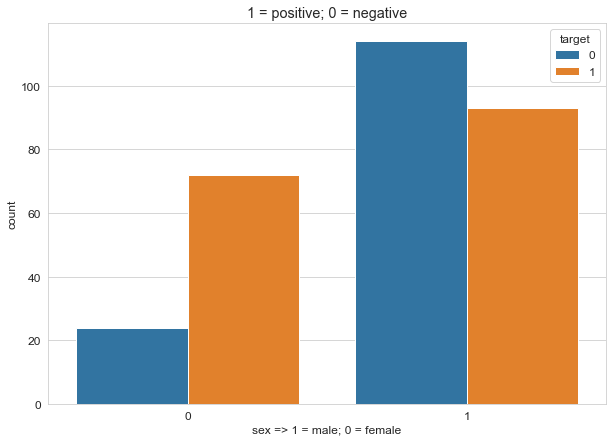

In [247]:
sns.countplot(x='sex',hue='target',data=df)
plt.title('1 = positive; 0 = negative')
plt.xlabel('sex => 1 = male; 0 = female')

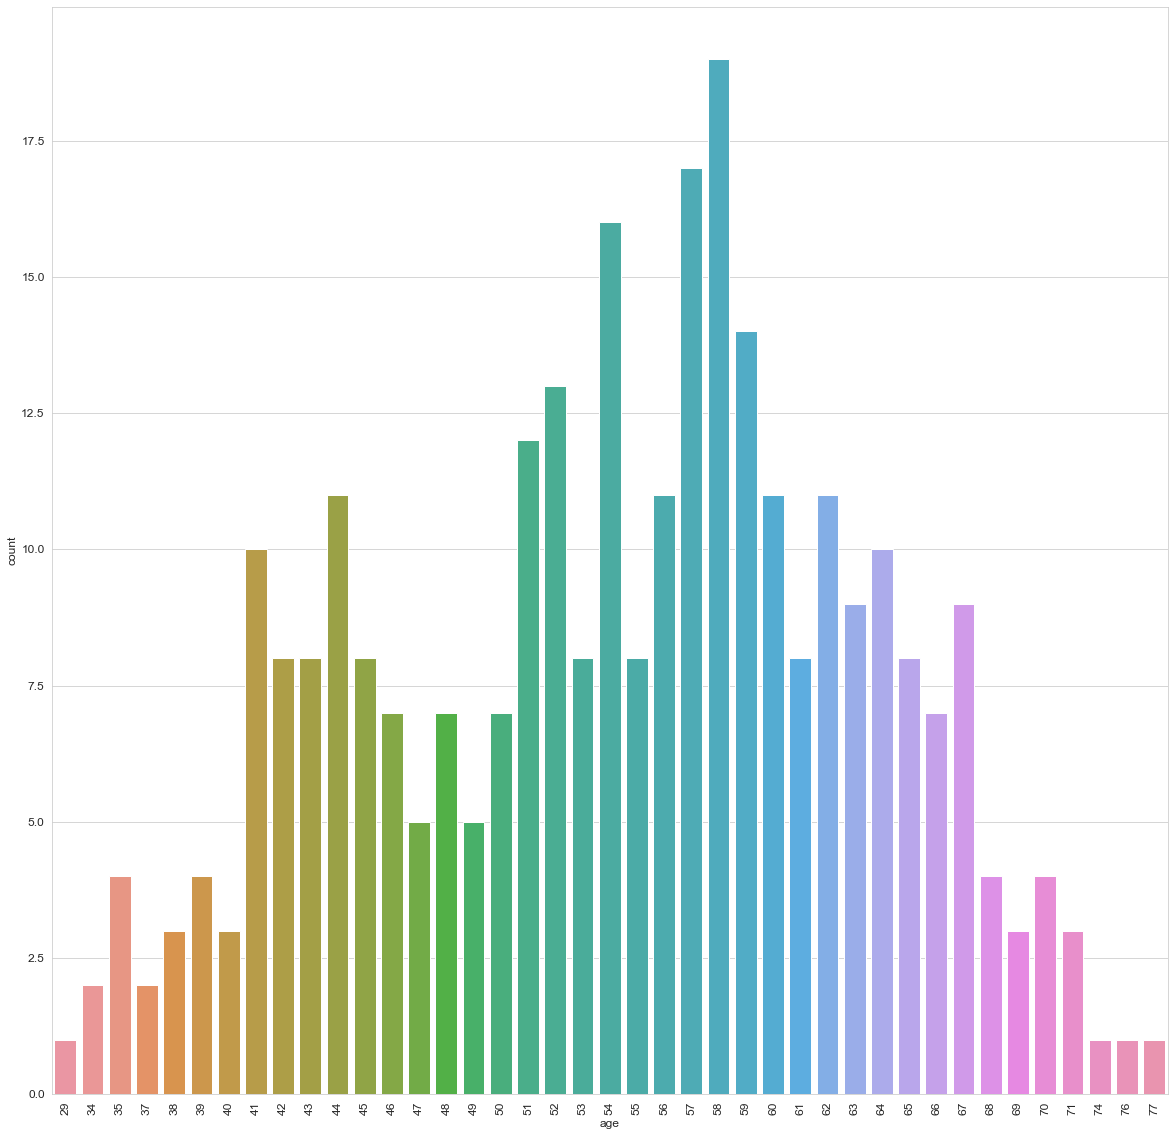

In [248]:
plt.figure(figsize=(20,20))
sns.countplot(x='age',data=df)
plt.xticks(rotation=90)
plt.show()

Creating Dummy Variables

In [249]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thalach'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [250]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,...,thal_187,thal_188,thal_190,thal_192,thal_194,thal_195,thal_202,slope_0,slope_1,slope_2
0,63,1,3,145,233,0,150,0,2.3,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,2,130,250,1,187,0,3.5,0,...,1,0,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,172,0,1.4,2,...,0,0,0,0,0,0,0,0,0,1
3,56,1,1,120,236,1,178,0,0.8,2,...,0,0,0,0,0,0,0,0,0,1
4,57,0,0,120,354,1,163,1,0.6,2,...,0,0,0,0,0,0,0,0,0,1


In [251]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,restecg,thalach,exang,oldpeak,ca,target,...,thal_187,thal_188,thal_190,thal_192,thal_194,thal_195,thal_202,slope_0,slope_1,slope_2
0,63,1,145,233,0,150,0,2.3,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,1,187,0,3.5,0,1,...,1,0,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,0,0,0,0,1
3,56,1,120,236,1,178,0,0.8,0,1,...,0,0,0,0,0,0,0,0,0,1
4,57,0,120,354,1,163,1,0.6,0,1,...,0,0,0,0,0,0,0,0,0,1


# Algorithm

In [252]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [253]:
x=df.drop('target',axis=1)
y=df.target

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(242, 107) (242,) (61, 107) (61,)


In [255]:
# #transpose matrices
# x_train = x_train.T
# y_train = y_train.T
# x_test = x_test.T
# y_test = y_test.T

accuracies = {}

Linear Regression

In [256]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Accuracy --> ",acc)


Accuracy -->  -1.5388087363816094e+21


Logistic regression

In [257]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
acc= model.score(x_test, y_test)*100
accuracies['Logistic Regression'] = acc
print("Accuracy --> ",acc)

Accuracy -->  78.68852459016394


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Random Forest 


In [258]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(x_train, y_train)
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Accuracy --> ",acc)



Accuracy -->  41.90172614379086


#Gradient Boosting Regresso

In [259]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
model.fit(x_train, y_train)
acc = model.score(x_test,y_test)*100
accuracies['Gradient Boosting Regresso'] = acc
print("Accuracy --> ",acc)


Accuracy -->  42.75809172113291


KNN

In [260]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(x_train, y_train)
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  68.85245901639344


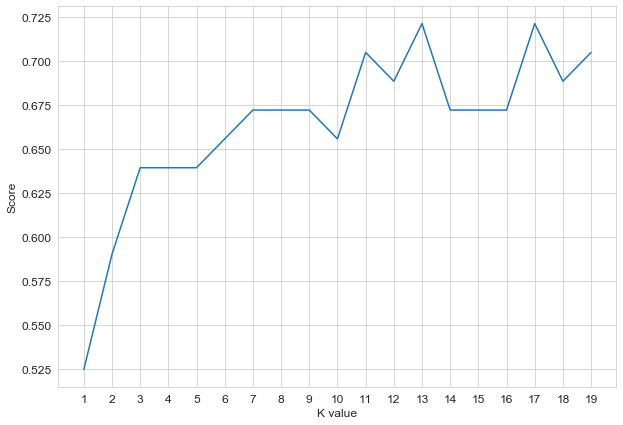

Maximum KNN Score is 72.13%


In [261]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

SVC

In [262]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("SVM Algorithm: {:.2f}%".format(acc))


SVM Algorithm: 52.46%


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Decision tree

In [263]:
from sklearn import tree
model= tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
#print("Accuracy --> ", model.score(x_test, y_test)*100)

acc = model.score(x_test,y_test)*100
accuracies['Decision tree'] = acc
print("Accuracy --> ",acc)


Accuracy -->  73.77049180327869


Compare Models

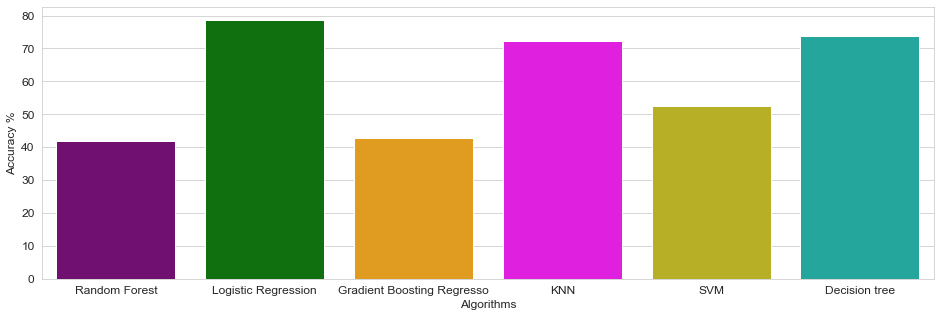

In [264]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
X=list(accuracies.keys())
Y=list(accuracies.values())
sns.barplot(x=X, y=Y,palette=colors)
plt.show()